In [1]:
%matplotlib inline
import os
from matplotlib import pyplot
import numpy as np
import datajoint as dj
dj.config['database.prefix'] = os.environ.get('DJ_PREFIX', 'user_kabilar_')
print(dj.config['database.prefix'])

from pipeline import meso, stack

user_kabilar_
Loading local settings from pipeline_config.json
Connecting kabilar@jr-database.ad.bcm.edu:3306


In [82]:
key_meso  = {'animal_id':124, 'session':2,      'scan_idx':1, 'field':1}
key_stack = {'animal_id':124, 'scan_session':2, 'scan_idx':1, 'field':1}

In [83]:
average_image= (meso.SummaryImages.Average & key_meso).fetch1('average_image')

In [93]:
x,y,z = (meso.ScanInfo.Field & key_meso).fetch1('x','y','z')

In [84]:
# Calculate aspect ratio of pixels
px_height, px_width, um_height, um_width = (meso.ScanInfo.Field & key_meso).fetch1('px_height','px_width','um_height','um_width')
dx_height = um_height/px_height
dx_width = um_width/px_width
aspect_meso = dx_height/dx_width

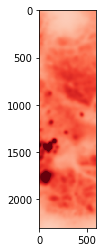

In [85]:
pyplot.imshow(average_image, vmin=-100, vmax=400, aspect=aspect_meso, cmap='Reds', extent=[0,um_width,um_height,0])

In [91]:
reg_field,reg_x,reg_y,reg_z = (stack.Registration.Affine & key_stack).fetch1('reg_field','reg_x','reg_y','reg_z')

In [87]:
np.shape(reg_field)

(2300, 600)

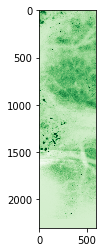

In [88]:
pyplot.imshow(reg_field, vmin=-100, vmax=400, aspect=1, cmap='Greens')

In [95]:
print(x, y, z, reg_x, reg_y, reg_z)

0.0 -90.0 80.0 786.148 777.296 104.864


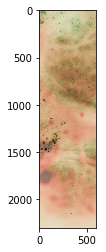

In [90]:
pyplot.imshow(average_image, vmin=-100, vmax=400 , aspect=aspect_meso, cmap='Reds',   extent=[0,um_width,um_height,0])
pyplot.imshow(reg_field,     vmin=-100, vmax=400,  aspect=1,           cmap='Greens', alpha=0.5)